# simply gradient descent implementation


In [13]:
import numpy as np

# Define the function (f(x) = x^2 + 4x + 4)
def func(x):
    return x**2 + 4*x + 4

# Define the derivative of the function (f'(x) = 2x + 4)
def derivative(x):
    return 2*x + 4

# Gradient Descent Function
def gradient_descent(learning_rate, initial_x, iterations):
    x = initial_x
    for i in range(iterations):
        grad = derivative(x)
        x = x - learning_rate * grad  # Update the value of x
        print(f"Iteration {i+1}: x = {x}, f(x) = {func(x)}")
    return x

# Parameters for Gradient Descent
learning_rate = 0.1  # Step size
initial_x = 10       # Starting point
iterations = 20      # Number of iterations

# Run Gradient Descent
optimal_x = gradient_descent(learning_rate, initial_x, iterations)
print(f"Optimal x: {optimal_x}, f(x) = {func(optimal_x)}")


Iteration 1: x = 7.6, f(x) = 92.16
Iteration 2: x = 5.68, f(x) = 58.9824
Iteration 3: x = 4.144, f(x) = 37.748736
Iteration 4: x = 2.9152, f(x) = 24.15919104
Iteration 5: x = 1.9321599999999999, f(x) = 15.4618822656
Iteration 6: x = 1.1457279999999999, f(x) = 9.895604649984
Iteration 7: x = 0.5165823999999998, f(x) = 6.333186975989759
Iteration 8: x = 0.01326591999999982, f(x) = 4.053239664633446
Iteration 9: x = -0.3893872640000002, f(x) = 2.594073385365405
Iteration 10: x = -0.7115098112000002, f(x) = 1.6602069666338588
Iteration 11: x = -0.9692078489600002, f(x) = 1.06253245864567
Iteration 12: x = -1.1753662791680002, f(x) = 0.6800207735332284
Iteration 13: x = -1.3402930233344001, f(x) = 0.43521329506126616
Iteration 14: x = -1.47223441866752, f(x) = 0.27853650883921066
Iteration 15: x = -1.577787534934016, f(x) = 0.17826336565709466
Iteration 16: x = -1.6622300279472129, f(x) = 0.11408855402054074
Iteration 17: x = -1.7297840223577703, f(x) = 0.0730166745731462
Iteration 18: x = 

Mean Squared Error on test set: 4.855436301653363


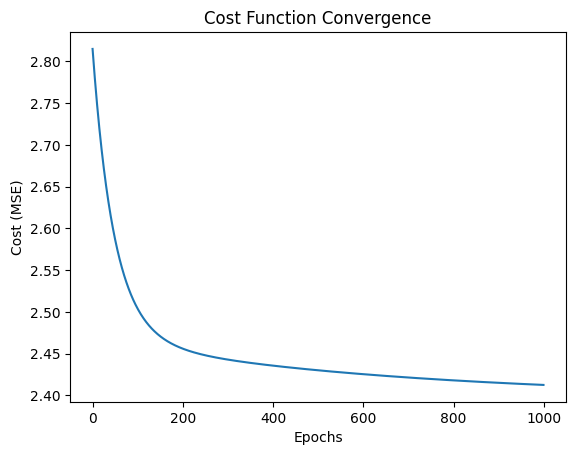

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define the Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize weights to zero
    cost_history = []

    for _ in range(epochs):
        # Compute the predictions
        y_pred = X.dot(theta)

        # Compute the cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)

        # Compute the gradient
        gradient = (1 / m) * X.T.dot(y_pred - y)

        # Update the weights
        theta -= learning_rate * gradient

    return theta, cost_history

# Step 4: Train the model using Gradient Descent
theta, cost_history = gradient_descent(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_train_pred = X_train.dot(theta)
y_test_pred = X_test.dot(theta)

# Calculate Mean Squared Error on the test set
mse = np.mean((y_test_pred - y_test) ** 2)
print(f"Mean Squared Error on test set: {mse}")

# Plot the cost function convergence
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()
